In [5]:
import pandas as pd

# Demand prediction problem
class DemandPrediction:
    N_DEMAND_INDICATORS = 13;
    # Parameters consist of a bias (intercept) for the sum and one weight for
    # each demand indicator.
    N_PARAMETERS = N_DEMAND_INDICATORS + 1;

    # Construct a Demand prediction problem instance.
    # The parameter "dataset_name" specifies which dataset to use. Valid values
    # are "train" or "test".
    def __init__(self,dataset_name):
      #Load the specified dataset
      if(dataset_name == "train"):
        self.__X, self.__y = DemandPrediction.__load_dataset("data/train.csv");
      elif(dataset_name == "test"):
        self.__X, self.__y = DemandPrediction.__load_dataset("data/test.csv");
      else:
        raise Exception("Only permitted arguments for " +
          "DemandPrediction::__init__ are train and test.")

    # Rectangular bounds on the search space.
    # Returns a 2D array b such that b[i][0] is the minimum permissible value
    # of the ith solution component and b[i][1] is the maximum.
    def bounds():
        return [[-100,100] for i in range(DemandPrediction.N_PARAMETERS)]

    # Check whether the function parameters (weights) lie within the
    # problem's feasible region.
    # There should be the correct number of weights for the predictor function.
    # Each weight should lie within the range specified by the bounds.
    def is_valid(self, parameters):
        if(len(parameters) != DemandPrediction.N_PARAMETERS):
          return False
        #All weights lie within the bounds.
        b = DemandPrediction.bounds();
        for i in range(len(b)):
          if(parameters[i] < b[i][0] or parameters[i] > b[i][1] ):
            return False
        return True;

    # Evaluate a set of parameters on the dataset used by the class instance
    # (train/test).
    # @param parameters An containing the bias and weights to be used to
    #   predict demand.
    # @return The mean absolute error of the predictions on the selected
    # dataset.
    def evaluate(self, parameters):
        abs_error = 0.0;
        for (x, y) in zip(self.__X,self.__y):
            #print(list(self.__X.values))
            #print(x)
            #print(y)
            #print('--')
            y_pred = DemandPrediction.__predict(x,parameters);
            abs_error += abs(y-y_pred);
        abs_error /= len(self.__X);
        return abs_error;

    def __load_dataset(filename):
        if "train.csv" in filename:
            df = pd.read_csv(filename)
            df = df.iloc[:, 1:]
        else:
            df = pd.read_csv(filename,header=None)
            # print(df.head())
        y = df.iloc[:,0].values
        X = df.iloc[:,1:].values
        return X, y

    # Predicts demand based on a weighted sum of demand indicators. You may
    # replace this with something more complex, but will likely have to change
    # the form of the parameters array as well.
    def __predict(demand_indicators, parameters):
        prediction = parameters[0];

        for i in range(1, len(demand_indicators)):
            prediction += demand_indicators[i] * parameters[i];

        return prediction;

In [6]:
import numpy as np
from DemandPrediction_v2 import DemandPrediction

# Define cost function
def cost_function(x):
    training_problem = DemandPrediction("train")
    error = training_problem.evaluate(x)
    return error

def pso(cost_function, bounds, n_particles, n_iterations, c1, c2, w, verbose = True):
    dimensions = len(bounds)
    
    # Initialize particle positions and velocities
    positions = np.array([np.random.uniform(bounds[:, 0], bounds[:, 1], dimensions) for _ in range(n_particles)])
    velocities = np.array([np.random.uniform(-1, 1, dimensions) for _ in range(n_particles)])
    
    # Initialize personal best and global best
    personal_best_positions = np.copy(positions)
    personal_best_costs = np.array([cost_function(p) for p in personal_best_positions])
    global_best_position = personal_best_positions[np.argmin(personal_best_costs)]
    global_best_cost = np.min(personal_best_costs)

    error_list = []
    # PSO main loop
    for t in range(n_iterations):
        for i in range(n_particles):
            # Update particle velocity
            r1, r2 = np.random.rand(2)
            velocities[i] = w * velocities[i] + c1 * r1 * (personal_best_positions[i] - positions[i]) + c2 * r2 * (global_best_position - positions[i])

            # Update particle position
            positions[i] += velocities[i]

            # Update personal best
            current_cost = cost_function(positions[i])
            if current_cost < personal_best_costs[i]:
                personal_best_positions[i] = positions[i]
                personal_best_costs[i] = current_cost

                # Update global best
                if current_cost < global_best_cost:
                    global_best_position = positions[i]
                    global_best_cost = current_cost

        # Optional: print progress
        if verbose:
            print("Iteration {}/{}, Global Best Cost: {}".format(t + 1, n_iterations, global_best_cost))
        error_list.append(global_best_cost)

    return global_best_cost, global_best_position, error_list




In [7]:
if __name__ == "__main__":
    # PSO hyperparameters
    n_particles = 100
    n_iterations = 1000
    c1 = 0.7
    c2 = 0.7
    w = 0.7

    bounds = np.array(DemandPrediction.bounds())

    # Run PSO optimization
    best_cost, best_position, error_list = pso(cost_function, bounds, n_particles, n_iterations, c1, c2, w)

    print("Best training error after {} iterations: {}".format(n_iterations, best_cost))

    # Check the MAE of the best solution on the test problem
    test_problem = DemandPrediction("test")
    test_error = test_problem.evaluate(best_position)
    print("Test error of best solution found while training: {}".format(test_error))


Iteration 1/1000, Global Best Cost: 351.060031885217
Iteration 2/1000, Global Best Cost: 259.41777046520826
Iteration 3/1000, Global Best Cost: 179.02810537290352
Iteration 4/1000, Global Best Cost: 179.02810537290352
Iteration 5/1000, Global Best Cost: 179.02810537290352
Iteration 6/1000, Global Best Cost: 179.02810537290352
Iteration 7/1000, Global Best Cost: 179.02810537290352
Iteration 8/1000, Global Best Cost: 179.02810537290352
Iteration 9/1000, Global Best Cost: 179.02810537290352
Iteration 10/1000, Global Best Cost: 174.2905211257557
Iteration 11/1000, Global Best Cost: 174.2905211257557
Iteration 12/1000, Global Best Cost: 171.48766407401794
Iteration 13/1000, Global Best Cost: 126.85950121192036
Iteration 14/1000, Global Best Cost: 119.12567235312147
Iteration 15/1000, Global Best Cost: 99.65225483729175
Iteration 16/1000, Global Best Cost: 66.2118654599538
Iteration 17/1000, Global Best Cost: 59.58410620720345
Iteration 18/1000, Global Best Cost: 59.58410620720345
Iteration 

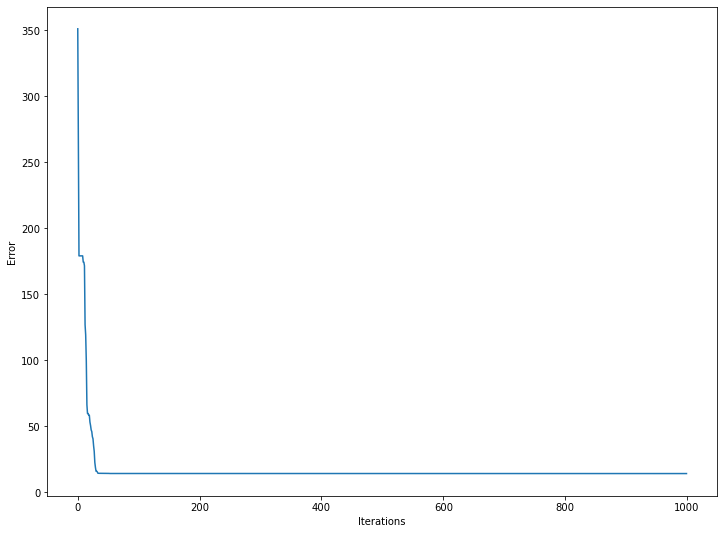

In [8]:
import matplotlib.pyplot as plt

# The variation of the cost over the iterations
plt.figure(figsize = (12, 9))
plt.plot(error_list)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

In [9]:
# The best parameters are listed as below
best_position

array([ 10.13946954,  -0.40617816,  -1.65668684,  -0.25289487,
         1.15142406,  -1.31987338,  -0.51119366,  30.6726183 ,
       -17.15520299,  -4.36671093,  -0.9351262 ,  25.07265986,
       -21.63400496,  44.85922185])